# Preparación de los datos

Se trabajará con el archivo Ventas Mensuales Familias CANACERO (general).xlsx

In [14]:
import pandas as pd
import numpy as np
from scipy import stats

In [15]:
df = pd.read_excel('Ventas Mensuales Familias CANACERO (general).xlsx', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Date - Año,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
1,Date - Mes,enero,febrero,marzo,abril,mayo,junio,julio,agosto,septiembre,octubre,noviembre,diciembre,Total
2,Familia_canacero,Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton),Vol. Ventas (ton)
3,01.01 PLACA DE ROLLO,11895.3625,9888.5144,12495.709202,10563.975845,12415.699501,9158.08613,9364.669076,10297.9038,9435.197966,11917.721084,11528.409421,10055.907618,129017.156543
4,01.02 PLACA DE HOJA,3344.6,2100.7279,1427.315,2159.007176,1756.58935,1513.713887,1629.255994,1714.584742,2143.985,2455.094,1493.714966,1613.859937,23352.447952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,03.01 LAMINA EN FRIO,2113.42402,1584.016766,1938.400407,3115.283621,2345.304927,2354.755399,2168.632921,2233.268887,1757.55097,1811.625677,1592.98446,1625.15153,24640.399585
79,04.01 LAMINA GALVANIZADA,849.110137,917.117851,734.49968,1371.437686,1212.08581,1199.652698,1216.774279,1269.222273,920.110951,773.780635,695.682987,982.345014,12141.820001
80,05.01 PERFILES ESTRUCTURALES,10009.979849,8833.40094,8568.851375,9901.739343,11008.613944,10978.805214,11659.852034,11144.154446,9430.918634,10306.215458,10489.060629,11469.374115,123800.965981
81,06.01 PERFILES COMERCIALES,3314.967227,3064.973702,3289.036158,4881.272478,4462.299007,3853.864003,5026.370211,4761.931939,3959.85273,4611.427861,4458.78518,4206.193787,49890.974283


In [16]:
def row_year(df):
    years_rows = {}
    for i, row in df.iterrows():
        if row[1] in range(2018, 2025):
            year = int(row[1])
            years_rows[year] = i
    return years_rows

In [17]:
def infoPerYear(df, rowWithYears, year, listaMeses):
    data = df.iloc[rowWithYears + 3:rowWithYears + 10, 0:13].copy()  # Filas correspondientes a ese año

    data.columns = ['Familia_canacero'] + listaMeses  # Nuevas columnas
    data = data.melt(id_vars='Familia_canacero', var_name='Mes', value_name='Vol. Ventas (ton)')
    data['Año'] = year
    return data

In [18]:
meses = df.iloc[1, 1:13].values.tolist()
rowsYears = row_year(df)
final = pd.DataFrame()

for year, row in rowsYears.items():
    yearly_data = infoPerYear(df, row, year, meses)
    final = pd.concat([final, yearly_data], ignore_index=True)

final = final[['Año', 'Mes', 'Familia_canacero', 'Vol. Ventas (ton)']] # Reacomodamos
final

,Año,Mes,Familia_canacero,Vol. Ventas (ton)
0,2018,enero,01.01 PLACA DE ROLLO,11895.3625
1,2018,enero,01.02 PLACA DE HOJA,3344.6
2,2018,enero,02.01 LAMINA EN CALIENTE,10674.189105
3,2018,enero,03.01 LAMINA EN FRIO,994.039
4,2018,enero,04.01 LAMINA GALVANIZADA,175.86
...,...,...,...,...
583,2024,diciembre,02.01 LAMINA EN CALIENTE,13234.452931
584,2024,diciembre,03.01 LAMINA EN FRIO,1625.15153
585,2024,diciembre,04.01 LAMINA GALVANIZADA,982.345014
586,2024,diciembre,05.01 PERFILES ESTRUCTURALES,11469.374115


In [19]:
final.shape

(588, 4)

El dataframe final tiene 588 filas y 4 columnas para las siguientes cuatro variables: Año	Mes	Familia_canacero	Vol. Ventas (ton).

In [20]:
final.to_csv('ventas_canacero.csv', index=False) # Se descargá el dataframe final como csv.

# Comprensión de los datos

Primero se checa por datos nulos o atípicos.

In [21]:
final['Familia_canacero'] = final['Familia_canacero'].astype('category')
final['Vol. Ventas (ton)'] = final['Vol. Ventas (ton)'].astype('int')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Año                588 non-null    int64   
 1   Mes                588 non-null    object  
 2   Familia_canacero   588 non-null    category
 3   Vol. Ventas (ton)  588 non-null    int64   
dtypes: category(1), int64(2), object(1)
memory usage: 14.8+ KB


In [22]:
final.nunique()

,0
Año,7
Mes,12
Familia_canacero,7
Vol. Ventas (ton),566


Esto nos indica que no hay datos vacios, hay 7 años (2018-2014), 12 meses, 7 tipos de productos de la familia canacero y ningun valor es igual en la columna de Vol. Ventas (ton).

# Exploración de los datos

## Medidas estadísticas
### Variables cuantitativas

Nuestra única varible cuantitativa es 'Vol. Ventas (ton)'. Para analizar los datos, agruparemos el volumen de venta según el tipo de producto de la Familia_canacero.

In [23]:
estadisticos = final.groupby('Familia_canacero')['Vol. Ventas (ton)'].describe()

moda = final.groupby('Familia_canacero')['Vol. Ventas (ton)'].apply(lambda x: x.mode().iloc[0])
varianza = final.groupby('Familia_canacero')['Vol. Ventas (ton)'].var().to_frame()

medidasEstadisticas = pd.merge(estadisticos, moda, on='Familia_canacero', how='left')
medidasEstadisticas = pd.merge(medidasEstadisticas, varianza, on='Familia_canacero', how='left')

medidasEstadisticas = medidasEstadisticas.rename(columns={'Vol. Ventas (ton)_x': 'Moda','Vol. Ventas (ton)_y': 'Varianza'})
medidasEstadisticas

<ipython-input-23-2ae3939863a3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estadisticos = final.groupby('Familia_canacero')['Vol. Ventas (ton)'].describe()
<ipython-input-23-2ae3939863a3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moda = final.groupby('Familia_canacero')['Vol. Ventas (ton)'].apply(lambda x: x.mode().iloc[0])
<ipython-input-23-2ae3939863a3>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vari

,count,mean,std,min,25%,50%,75%,max,Moda,Varianza
Familia_canacero,,,,,,,,,,
01.01 PLACA DE ROLLO,84.0,12246.678571,3162.777196,6520.0,9822.75,11573.5,14179.75,19872.0,6520,1.000316e+07
01.02 PLACA DE HOJA,84.0,2188.511905,673.106044,885.0,1729.00,2117.0,2452.00,4663.0,1972,4.530717e+05
02.01 LAMINA EN CALIENTE,84.0,10958.857143,3824.860014,5171.0,7862.75,10171.5,13147.50,22955.0,9502,1.462955e+07
03.01 LAMINA EN FRIO,84.0,1602.940476,705.345397,600.0,934.25,1615.0,2120.50,3309.0,2113,4.975121e+05
04.01 LAMINA GALVANIZADA,84.0,580.952381,419.465348,103.0,182.25,531.5,948.50,1575.0,170,1.759512e+05
05.01 PERFILES ESTRUCTURALES,84.0,9930.238095,1579.340877,5749.0,8815.25,9917.0,11009.00,15987.0,5749,2.494318e+06
06.01 PERFILES COMERCIALES,84.0,4079.202381,816.028463,2669.0,3418.00,4094.5,4621.50,6196.0,4346,6.659025e+05


### Variables cualitativas

Tabla de distribución de frecuencia

In [24]:
def estadistica_categorica(dataframe):
    cat_vars = ['Año', 'Mes', 'Familia_canacero']

    for var in cat_vars:
        print(f"\n Frecuencias para: {var}")
        freq_abs = dataframe[var].value_counts()
        freq_rel = dataframe[var].value_counts(normalize=True) * 100
        freq_table = pd.DataFrame({'Frecuencia Absoluta': freq_abs, 'Frecuencia Relativa (%)': freq_rel.round(2)})
        print(freq_table)

In [25]:
categorica = estadistica_categorica(final)
categorica


 Frecuencias para: Año
      Frecuencia Absoluta  Frecuencia Relativa (%)
Año                                               
2018                   84                    14.29
2019                   84                    14.29
2020                   84                    14.29
2021                   84                    14.29
2022                   84                    14.29
2023                   84                    14.29
2024                   84                    14.29

 Frecuencias para: Mes
            Frecuencia Absoluta  Frecuencia Relativa (%)
Mes                                                     
enero                        49                     8.33
febrero                      49                     8.33
marzo                        49                     8.33
abril                        49                     8.33
mayo                         49                     8.33
junio                        49                     8.33
julio                        49      

Como en los tres casos, los datos se repiten la misma cantidad de veces no hay moda.

Mediana (escala ordinal)

Año: 2021

Mes: Entre Junio y Julio

## Visualización de los datos

### Variables cuantitativas

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

### Boxplots e Histogramas

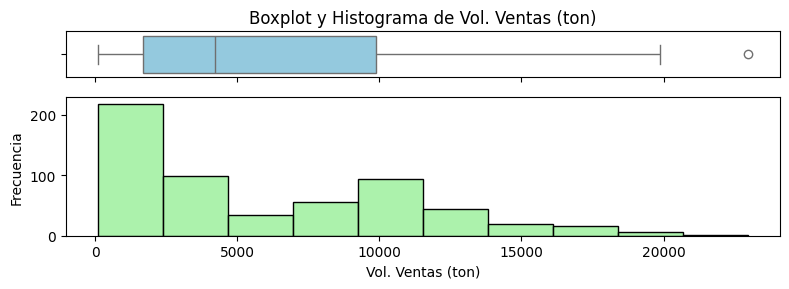

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 3), sharex=True, gridspec_kw={'height_ratios': [1, 3]})
sns.boxplot(x=final['Vol. Ventas (ton)'], ax=axes[0], orient='h', color='skyblue')
axes[0].set(title='Boxplot y Histograma de Vol. Ventas (ton)')
axes[0].set(xlabel='')

# Histograma en la fila inferior
sns.histplot(final['Vol. Ventas (ton)'], bins=10, kde=False, ax=axes[1], color='lightgreen')
axes[1].set(xlabel='Vol. Ventas (ton)', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

<ipython-input-28-f64af9197c6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Familia_canacero', x='Vol. Ventas (ton)', data=final, ax=axes[0], orient='h', palette='pastel')


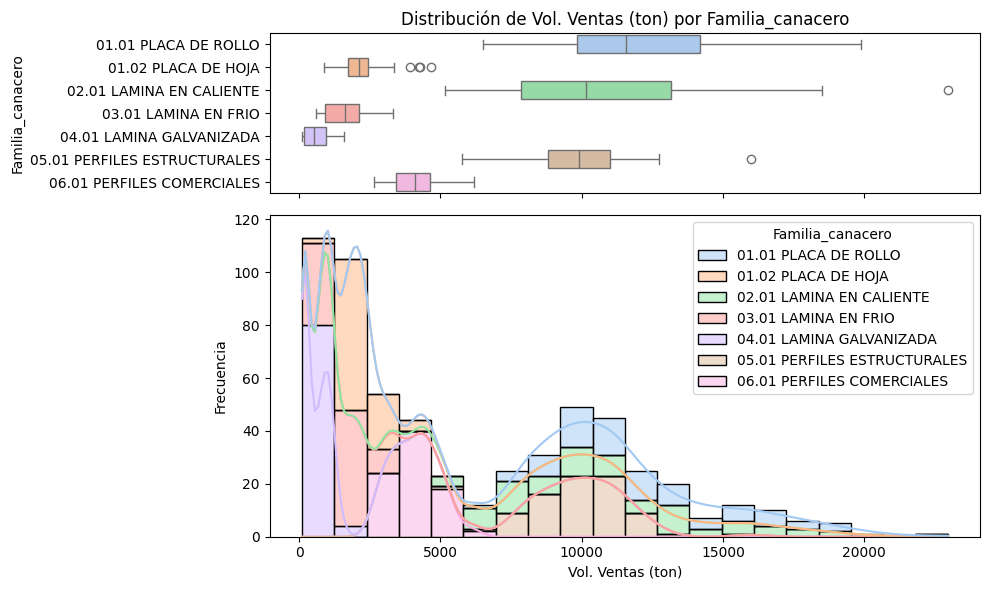

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1.5, 3]})

#Boxplot
sns.boxplot(y='Familia_canacero', x='Vol. Ventas (ton)', data=final, ax=axes[0], orient='h', palette='pastel')
axes[0].set(title='Distribución de Vol. Ventas (ton) por Familia_canacero')
axes[0].set(xlabel='')

# Histograma
sns.histplot(data=final, x='Vol. Ventas (ton)', hue='Familia_canacero', ax=axes[1], bins=20, kde=True, palette='pastel', multiple='stack')
axes[1].set(xlabel='Vol. Ventas (ton)', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

<ipython-input-29-e9f1886add5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Mes', x='Vol. Ventas (ton)', data=final, ax=axes[0], orient='h', palette='pastel')


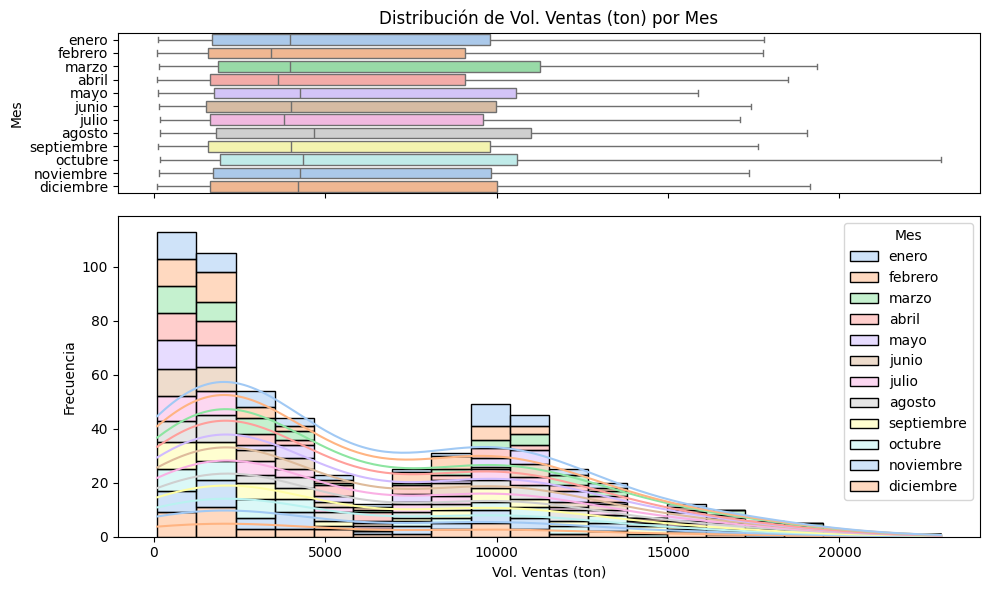

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1.5, 3]})

#Boxplot
sns.boxplot(y='Mes', x='Vol. Ventas (ton)', data=final, ax=axes[0], orient='h', palette='pastel')
axes[0].set(title='Distribución de Vol. Ventas (ton) por Mes')
axes[0].set(xlabel='')

# Histograma
sns.histplot(data=final, x='Vol. Ventas (ton)', hue='Mes', ax=axes[1], bins=20, kde=True, palette='pastel', multiple='stack')
axes[1].set(xlabel='Vol. Ventas (ton)', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

<ipython-input-30-20fc17f56571>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Año', x='Vol. Ventas (ton)', data=final, ax=axes[0], orient='h', palette='pastel')


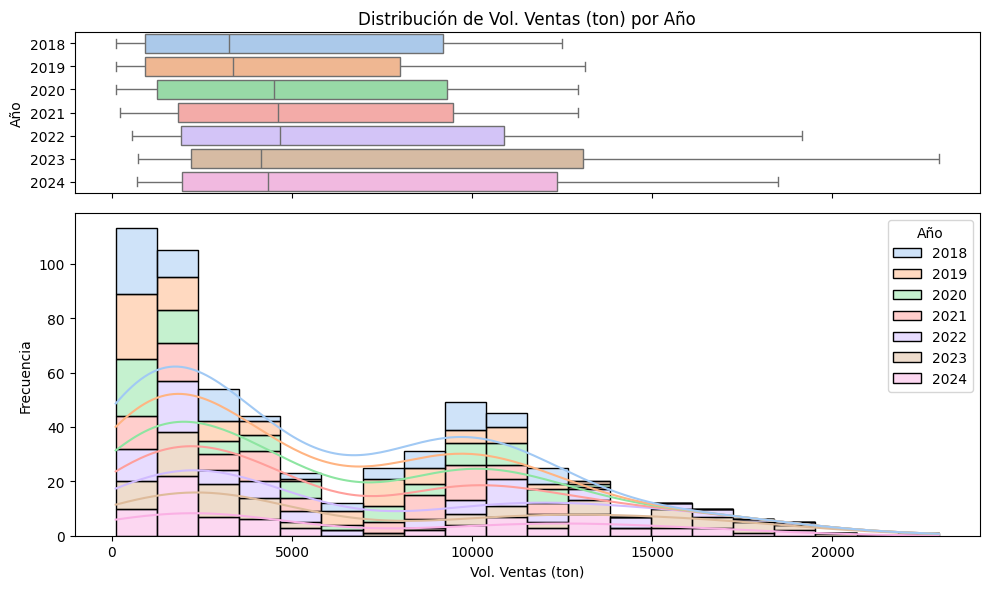

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6), sharex=True, gridspec_kw={'height_ratios': [1.5, 3]})

#Boxplot
sns.boxplot(y='Año', x='Vol. Ventas (ton)', data=final, ax=axes[0], orient='h', palette='pastel')
axes[0].set(title='Distribución de Vol. Ventas (ton) por Año')
axes[0].set(xlabel='')

# Histograma
sns.histplot(data=final, x='Vol. Ventas (ton)', hue='Año', ax=axes[1], bins=20, kde=True, palette='pastel', multiple='stack')
axes[1].set(xlabel='Vol. Ventas (ton)', ylabel='Frecuencia')

plt.tight_layout()
plt.show()

In [31]:
final

,Año,Mes,Familia_canacero,Vol. Ventas (ton)
0,2018,enero,01.01 PLACA DE ROLLO,11895
1,2018,enero,01.02 PLACA DE HOJA,3344
2,2018,enero,02.01 LAMINA EN CALIENTE,10674
3,2018,enero,03.01 LAMINA EN FRIO,994
4,2018,enero,04.01 LAMINA GALVANIZADA,175
...,...,...,...,...
583,2024,diciembre,02.01 LAMINA EN CALIENTE,13234
584,2024,diciembre,03.01 LAMINA EN FRIO,1625
585,2024,diciembre,04.01 LAMINA GALVANIZADA,982
586,2024,diciembre,05.01 PERFILES ESTRUCTURALES,11469


<ipython-input-32-40aa5bcf6bee>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='fecha', y='Vol. Ventas (ton)', data=final, marker='o',ci = None)


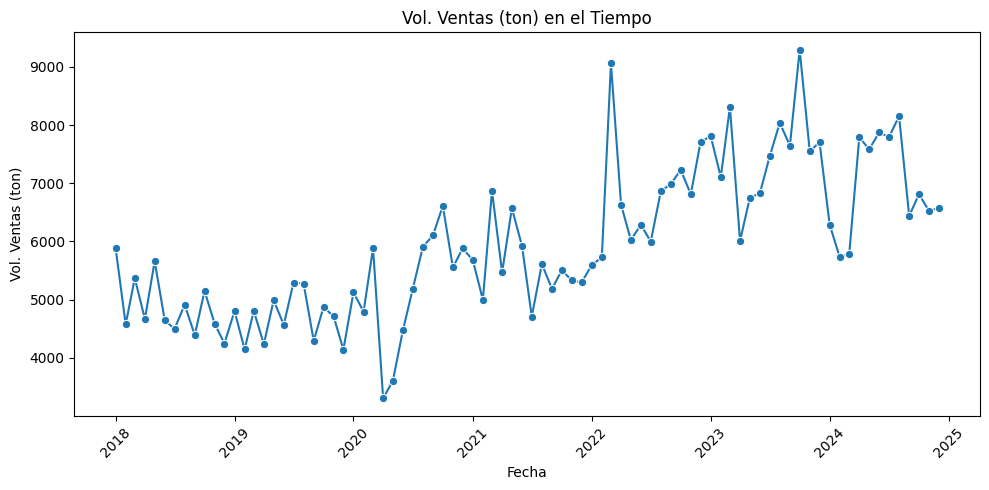

In [32]:
meses2 = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir mes a número
final['mes_num'] = final['Mes'].map(meses2)

# Crear columna de fecha tipo datetime (año-mes-01)
final['fecha'] = pd.to_datetime(dict(year=final['Año'], month=final['mes_num'], day=1))

# Ordenar por fecha
final = final.sort_values('fecha')
df_agrupado = final.groupby('fecha')['Vol. Ventas (ton)'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 5))
sns.lineplot(x='fecha', y='Vol. Ventas (ton)', data=final, marker='o',ci = None)
plt.title('Vol. Ventas (ton) en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Vol. Ventas (ton)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-33-e6055db64785>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = final.groupby(['fecha', 'Familia_canacero'])['Vol. Ventas (ton)'].sum().reset_index()


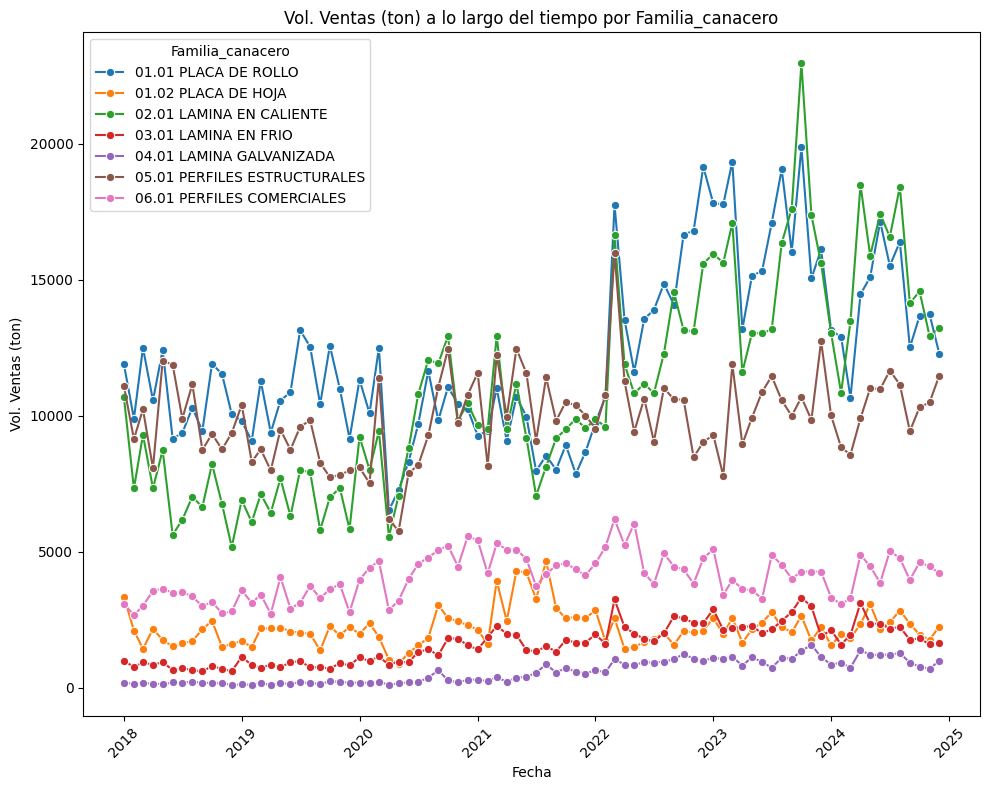

In [33]:
df_agrupado = final.groupby(['fecha', 'Familia_canacero'])['Vol. Ventas (ton)'].sum().reset_index()
plt.figure(figsize=(10, 8))
sns.lineplot(x='fecha', y='Vol. Ventas (ton)', hue='Familia_canacero', data=df_agrupado, marker='o')
plt.title('Vol. Ventas (ton) a lo largo del tiempo por Familia_canacero')
plt.xlabel('Fecha')
plt.ylabel('Vol. Ventas (ton)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Mapa de calor

In [34]:
final

,Año,Mes,Familia_canacero,Vol. Ventas (ton),mes_num,fecha
0,2018,enero,01.01 PLACA DE ROLLO,11895,1,2018-01-01
1,2018,enero,01.02 PLACA DE HOJA,3344,1,2018-01-01
2,2018,enero,02.01 LAMINA EN CALIENTE,10674,1,2018-01-01
3,2018,enero,03.01 LAMINA EN FRIO,994,1,2018-01-01
4,2018,enero,04.01 LAMINA GALVANIZADA,175,1,2018-01-01
...,...,...,...,...,...,...
582,2024,diciembre,01.02 PLACA DE HOJA,2237,12,2024-12-01
583,2024,diciembre,02.01 LAMINA EN CALIENTE,13234,12,2024-12-01
584,2024,diciembre,03.01 LAMINA EN FRIO,1625,12,2024-12-01
585,2024,diciembre,04.01 LAMINA GALVANIZADA,982,12,2024-12-01


In [35]:
df_pivot = final.pivot_table(index=['Año', 'Mes'], columns='Familia_canacero', values='Vol. Ventas (ton)', aggfunc='sum')
df_pivot

<ipython-input-35-e269520fd33c>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_pivot = final.pivot_table(index=['Año', 'Mes'], columns='Familia_canacero', values='Vol. Ventas (ton)', aggfunc='sum')


Familia_canacero  01.01 PLACA DE ROLLO  01.02 PLACA DE HOJA  \
Año  Mes                                                      
2018 abril                       10563                 2159   
     agosto                      10297                 1714   
     diciembre                   10055                 1613   
     enero                       11895                 3344   
     febrero                      9888                 2100   
...                                ...                  ...   
2024 marzo                       10664                 1813   
     mayo                        15098                 3064   
     noviembre                   13729                 1764   
     octubre                     13660                 1944   
     septiembre                  12510                 2352   

Familia_canacero  02.01 LAMINA EN CALIENTE  03.01 LAMINA EN FRIO  \
Año  Mes                                                           
2018 abril                            7331                   835   
     agosto                           7024                   638   
     diciembre                        5171                   603   
     enero                           10674                   994   
     febrero                          7326                   753   
...                                    ...                   ...   
2024 marzo                           13464                  1938   
     mayo                            15880                  2345   
     noviembre                       12933                  1592   
     octubre                         14576                  1811   
     septiembre                      14132                  1757   

Familia_canacero  04.01 LAMINA GALVANIZADA  05.01 PERFILES ESTRUCTURALES  \
Año  Mes                                                                   
2018 abril                             148                          8067   
     agosto                            216                         11155   
     diciembre                         104                          9364   
     enero                             175                         11091   
     febrero                           143                          9140   
...                                    ...                           ...   
2024 marzo                             734                          8568   
     mayo                             1212                         11008   
     noviembre                         695                         10489   
     octubre                           773                         10306   
     septiembre                        920                          9430   

Familia_canacero  06.01 PERFILES COMERCIALES  
Año  Mes                                      
2018 abril                              3560  
     agosto                             3352  
     diciembre                          2803  
     enero                              3079  
     febrero                            2669  
...                                      ...  
2024 marzo                              3289  
     mayo                               4462  
     noviembre                          4458  
     octubre                            4611  
     septiembre                         3959  

[84 rows x 7 columns]

In [36]:
correlation_matrix = df_pivot.corr()
correlation_matrix

Familia_canacero,01.01 PLACA DE ROLLO,01.02 PLACA DE HOJA,02.01 LAMINA EN CALIENTE,03.01 LAMINA EN FRIO,04.01 LAMINA GALVANIZADA,05.01 PERFILES ESTRUCTURALES,06.01 PERFILES COMERCIALES
Familia_canacero,,,,,,,
01.01 PLACA DE ROLLO,1.000000,0.028991,0.811748,0.700581,0.752103,0.348324,0.229101
01.02 PLACA DE HOJA,0.028991,1.000000,0.194107,0.216306,0.161603,0.446279,0.325915
02.01 LAMINA EN CALIENTE,0.811748,0.194107,1.000000,0.894318,0.872045,0.429549,0.481585
03.01 LAMINA EN FRIO,0.700581,0.216306,0.894318,1.000000,0.868088,0.411935,0.571848
04.01 LAMINA GALVANIZADA,0.752103,0.161603,0.872045,0.868088,1.000000,0.351472,0.375638
05.01 PERFILES ESTRUCTURALES,0.348324,0.446279,0.429549,0.411935,0.351472,1.000000,0.549422
06.01 PERFILES COMERCIALES,0.229101,0.325915,0.481585,0.571848,0.375638,0.549422,1.000000


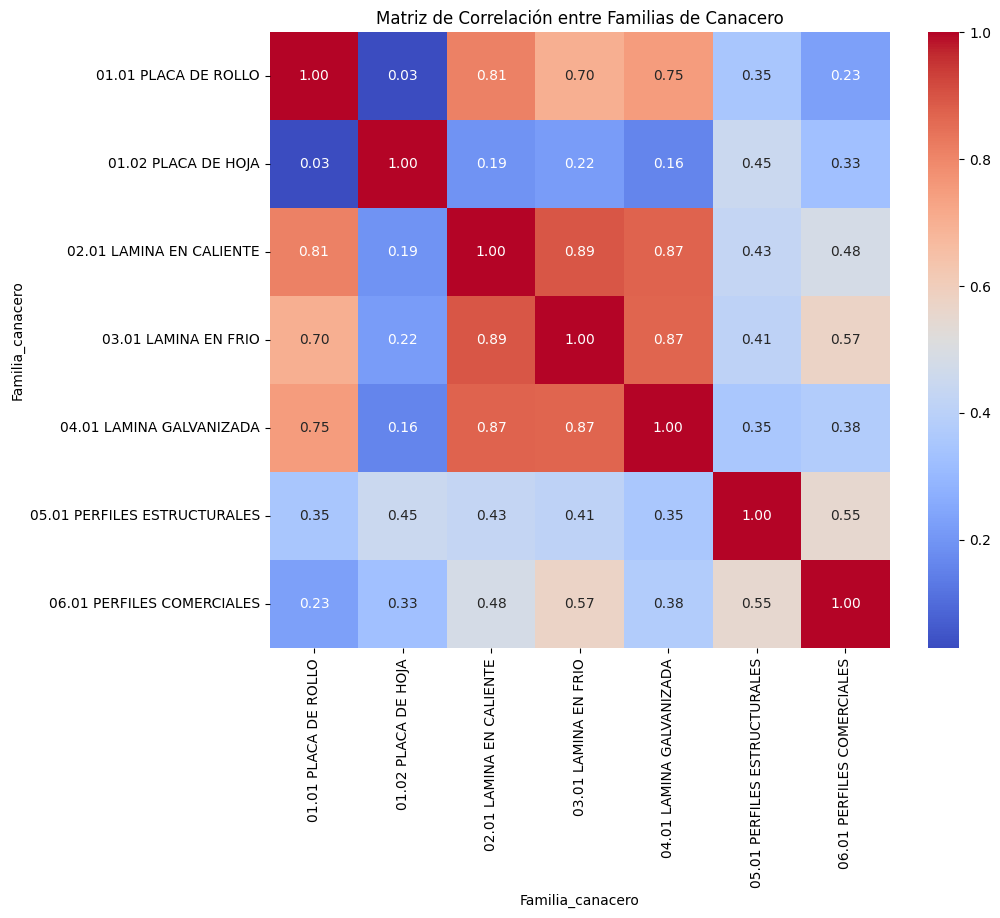

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Matriz de Correlación entre Familias de Canacero')
plt.show()

### Variables categóricas

### Diagramas de barras/Diagramas de pastel

<ipython-input-38-6e639c9caacb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Familia_canacero', data=final, ax=axs[0], palette='pastel')


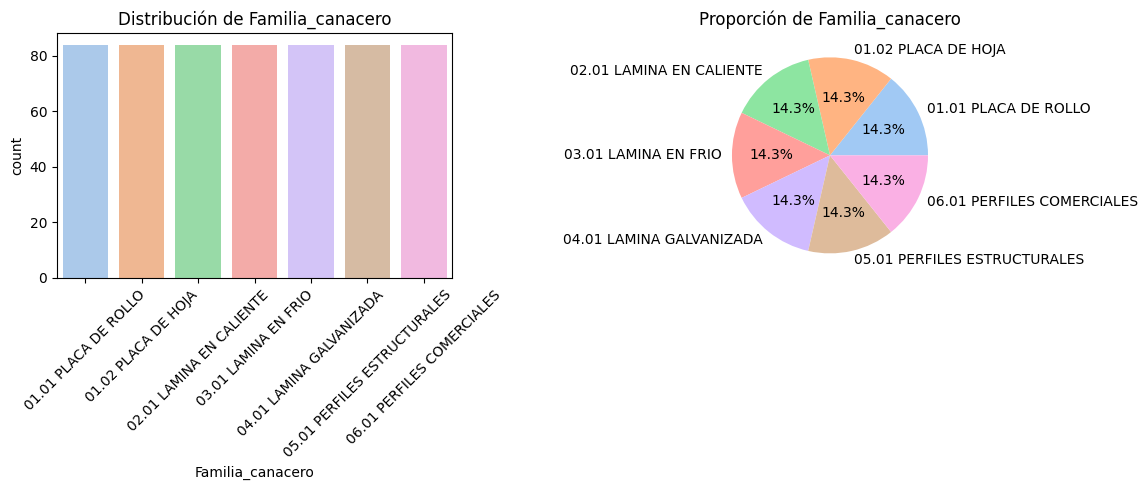

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Diagrama de barras
sns.countplot(x='Familia_canacero', data=final, ax=axs[0], palette='pastel')
axs[0].set_title(f'Distribución de Familia_canacero')
axs[0].tick_params(axis='x', rotation=45)

# Diagrama de pastel
final['Familia_canacero'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=sns.color_palette('pastel'))
axs[1].set_ylabel('')
axs[1].set_title(f'Proporción de Familia_canacero')

plt.tight_layout()
plt.show()

<ipython-input-39-e1fadd9bd59c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Año', data=final, ax=axs[0], palette='pastel')


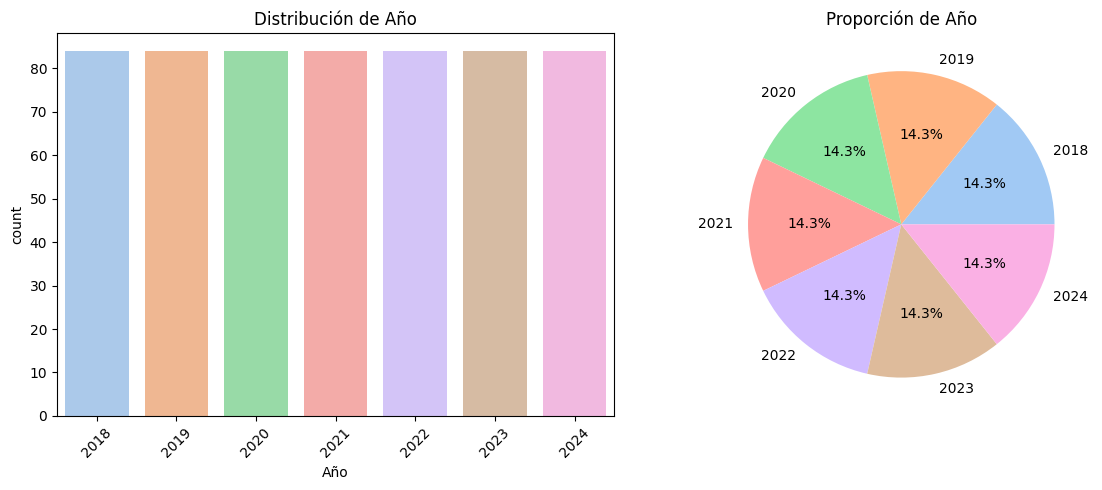

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Diagrama de barras
sns.countplot(x='Año', data=final, ax=axs[0], palette='pastel')
axs[0].set_title(f'Distribución de Año')
axs[0].tick_params(axis='x', rotation=45)

# Diagrama de pastel
final['Año'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=sns.color_palette('pastel'))
axs[1].set_ylabel('')
axs[1].set_title(f'Proporción de Año')

plt.tight_layout()
plt.show()

<ipython-input-40-03b77b6f8085>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Mes', data=final, ax=axs[0], palette='pastel')


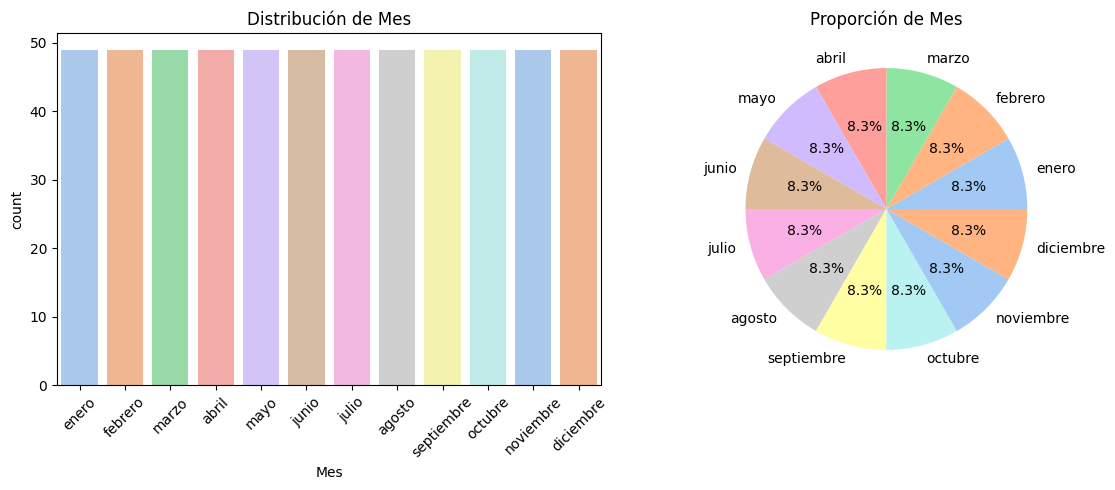

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Diagrama de barras
sns.countplot(x='Mes', data=final, ax=axs[0], palette='pastel')
axs[0].set_title(f'Distribución de Mes')
axs[0].tick_params(axis='x', rotation=45)

# Diagrama de pastel
final['Mes'].value_counts().plot.pie(autopct='%1.1f%%', ax=axs[1], colors=sns.color_palette('pastel'))
axs[1].set_ylabel('')
axs[1].set_title(f'Proporción de Mes')

plt.tight_layout()
plt.show()

Como los datos se repiten la misma cantidad de veces, la distribución es igual.

In [42]:
final

,Año,Mes,Familia_canacero,Vol. Ventas (ton),mes_num,fecha
0,2018,enero,01.01 PLACA DE ROLLO,11895,1,2018-01-01
1,2018,enero,01.02 PLACA DE HOJA,3344,1,2018-01-01
2,2018,enero,02.01 LAMINA EN CALIENTE,10674,1,2018-01-01
3,2018,enero,03.01 LAMINA EN FRIO,994,1,2018-01-01
4,2018,enero,04.01 LAMINA GALVANIZADA,175,1,2018-01-01
...,...,...,...,...,...,...
582,2024,diciembre,01.02 PLACA DE HOJA,2237,12,2024-12-01
583,2024,diciembre,02.01 LAMINA EN CALIENTE,13234,12,2024-12-01
584,2024,diciembre,03.01 LAMINA EN FRIO,1625,12,2024-12-01
585,2024,diciembre,04.01 LAMINA GALVANIZADA,982,12,2024-12-01


In [51]:
final2 = final.copy()
final2.drop(columns=['Mes','fecha'], inplace=True)
final2.head()

,Año,Familia_canacero,Vol. Ventas (ton),mes_num
0,2018,01.01 PLACA DE ROLLO,11895,1
1,2018,01.02 PLACA DE HOJA,3344,1
2,2018,02.01 LAMINA EN CALIENTE,10674,1
3,2018,03.01 LAMINA EN FRIO,994,1
4,2018,04.01 LAMINA GALVANIZADA,175,1


In [52]:
final2['Fecha'] = pd.to_datetime(dict(year=final2['Año'], month=final2['mes_num'], day=1)).dt.to_period('M')
final2.drop(columns=['Año','mes_num'], inplace=True)

cols = ['Fecha'] + [col for col in final2.columns if col != 'Fecha']
final2 = final2[cols]
final2.head()

,Fecha,Familia_canacero,Vol. Ventas (ton)
0,2018-01,01.01 PLACA DE ROLLO,11895
1,2018-01,01.02 PLACA DE HOJA,3344
2,2018-01,02.01 LAMINA EN CALIENTE,10674
3,2018-01,03.01 LAMINA EN FRIO,994
4,2018-01,04.01 LAMINA GALVANIZADA,175


In [53]:
final2.to_csv('ventas_canacero_final.csv', index=False)